# Exploratory Data Analysis
1. Load libraries
2. Load Data
3. Check for missing values
4. Check for datatypes
5. Check variable correlations

In [1]:
# 1. Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# 2. Load data

df = pd.read_csv('*') # insert path to dataset
df.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


**Input variables:**<br/>
- layer_height<br/>
- wall_thickness<br/>
- infill_density<br/>
- infill_pattern<br/>
- nozzle_temperature<br/>
- bed_temperature<br/>
- print_speed<br/>
- fan_speed<br/>
<br/>

**Output variables:**<br/>
- roughness<br/>
- tension_strength<br/>
- elongation<br/>
<br/>

**Target variable:**<br/>
- material

In [3]:
# Rename misspelled column name
df.columns = ['tension_strength' if item == 'tension_strenght' else item for item in df.columns]

In [4]:
# 3. Check for missing values

if df.isna().any().any() == False:
    print('There are no missing values in the dataset.')
else:
    print(df.isna().any())

There are no missing values in the dataset.


In [5]:
# 4. Check for datatypes

print(df.dtypes)

layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tension_strength        int64
elongation            float64
dtype: object


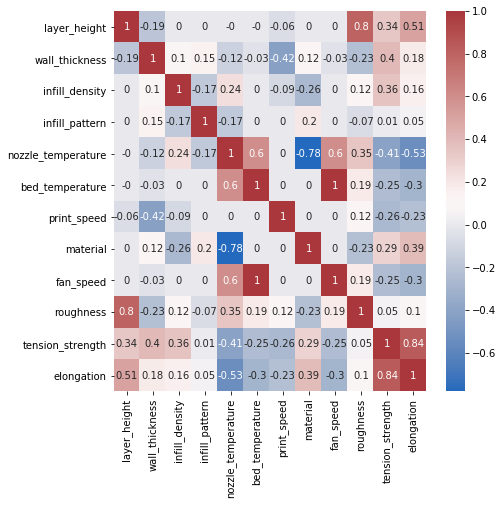

In [6]:
# 5. Check variable correlations

# turn 'infill_pattern' from categorical into numerical values: 'grid' = 0; 'honeycomb' = 1
df.infill_pattern = [0 if item == 'grid' else 1 for item in df.infill_pattern]

# turn 'material' from categorical into numerical values: 'abs' = 0; 'pla' = 1
# abs = Acrylonitrile Butadiene Styrene; pla = Polylactic Acid
df.material = [0 if item == 'abs' else 1 for item in df.material]

# plot correlation matrix
matrix = df.corr(method = 'pearson').round(2)
plt.figure(figsize=(7, 7))
sns.heatmap(matrix, annot = True, cmap = 'vlag')
plt.show()

**Correlations of input variables**:<br/>
'fan_speed' and 'bed_temperature' are fully positively correlated. The higher the bed temperature, the higher the fan speed.<br/>
'nozzle_temperature' and 'material' (where 0 = ABS and 1 = PLA) are negatively correlated. For ABS, we tend to have higher nozzle temperatures.<br/>
'roughness' and 'layer_height' are positively correlated. The higher the layers, the rougher the material becomes.


**Correlations of output variables**:<br/>
'tension_strength' and 'elongation' are positively correlated. The more tension strength there is, the larger the elongation.

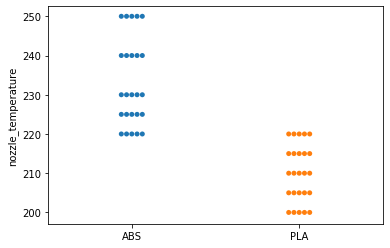

In [7]:
# Plot relationship netween nozzle temperature and materials
sns.swarmplot(x = ['ABS' if item == 0 else 'PLA' for item in df.material], y = df.nozzle_temperature)
plt.show()

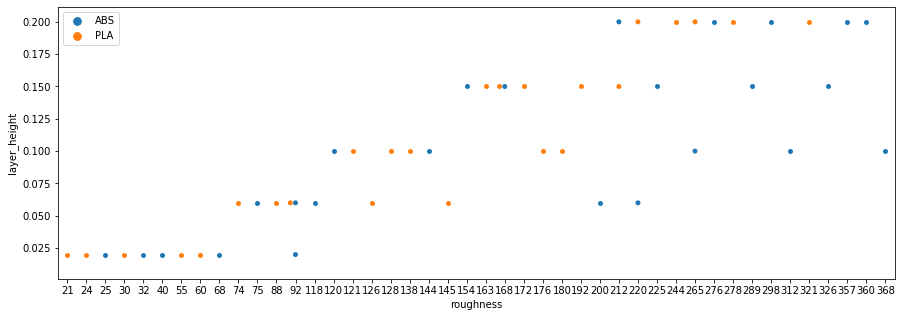

In [8]:
# Plot relationship between layer height and roughness of printed material
plt.figure(figsize=(15, 5))
sns.swarmplot(x = df.roughness, y = df.layer_height, hue = ['ABS' if item == 0 else 'PLA' for item in df.material])
plt.show()

Besides the fact that an increase in layer height tends to create rougher material, it is obvious that Acrylonitrile Butadiene Styrene seems to already become rougher at a lower layer height than Polylactic Acid.

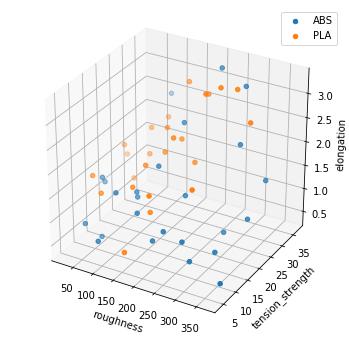

In [9]:
# Plot realtionship between the three output variables roughness, tension stength and elongation with respect to materials

# split data into DataFrame for ABS and for PLA
df_abs = df[df.material == 0]
df_pla = df[df.material == 1]

# create figure
fig = plt.figure
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

# scatter data
ax.scatter3D(df_abs.roughness, df_abs.tension_strength, df_abs.elongation, label = 'ABS')
ax.scatter3D(df_pla.roughness, df_pla.tension_strength, df_pla.elongation, label = 'PLA')

# assign labels
ax.set_xlabel('roughness')
ax.set_ylabel('tension_strength')
ax.set_zlabel('elongation')
ax.legend(loc=1)

plt.show()